# The Classification of Wine
##### Group 27: Richard Li, Herman Liao, Chi Pham, Georgia Simkin

## Introduction:
Given the chemical properties, specifically Flavonoid and Color Intensity values of an unknown wine, is it possible to accurately classify the wine’s type?  The three wine types explored in this project are Pinot Noir, Merlot, and Cabernet Sauvignon.

The dataset we have selected explores different types of wine: Pinot Noir, Merlot, and Cabernet Sauvignon, all grown in the same Italian region, however, they’re produced with different cultivators.  These different cultivators allow for the different classifications of wines, leading to the goal of this project to see if we can properly classify types of wines based on the chosen predictors. 

This set contains data on 13 attributes: Alcohol content, Malic Acid, Ash, Magnesium, Total Phenols, Flavonoids, Nonflavanoid Phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline. However, the Flavonoid and Color Intensity variables show the strongest correlation, which is why they’ve become the focus of the project. The dataset also contains 178 different observations of wine samples grown in the same region; it is a classification problem, as we wish to classify the predicted type of wine.

Based on the research done by Jonathon Betchels website (https://jonathonbechtel.com/blog/2018/02/06/wines/) it is most likely the different classes of wine: 1, 2, and 3 match with Pinot Noir, Cabernet Sauvignon, and Merlot respectively. These wines have different features; Pinot Noir is a dry dark blue-colored wine grape, Cabernet Sauvignon has more of a dark fruit flavor, and lastly, Merlot is a medium-bodied wine with an accented cinnamon taste.  A study created by YouGovAmerica depicts that 60% of Americans consume wine monthly with 19% consuming Merlot, 18% Cabernet Sauvignon, and 12% driving Pinot Noir, which is a substantial amount of the population.  This study indicates the importance of properly classifying the types of wines as consumers have preferences in tastes, making it imperative to create a plot to identify each wine type.

## Methods

First, we perform some preliminary exploratory data analysis in order to understand our data set better and choose our predictors for our classification problem. Then, we will go into the main data analysis in order to answer our predictive question.

### Preliminary Exploratory Data Analysis

We begin by loading all necessary packages and libraries.

In [1]:
# Install and load necessary packages
library(repr)
library(tidyverse)
# install.packages("tidymodels")  ##Uncomment if package not available
library(tidymodels)
library(cowplot)
install.packages("GGally")
library(GGally)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflict

We set the seed value to make this report reproducible, and set the display options.

In [2]:
# Set seed and options
set.seed(27)
options(repr.matrix.max.rows = 15)

#### Read data set into R
We begin by loading the data set directly from the web into R. The original data set did not contain column names so we set `col_names` to `FALSE`.

In [3]:
# Read dataset from the web into R
wine <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", 
    col_names = FALSE)
head(wine)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
  X14 = col_double()
)



X1 X2    X3   X4   X5   X6  X7   X8   X9   X10  X11  X12  X13  X14 
1 1  14.23 1.71 2.43 15.6 127 2.80 3.06 0.28 2.29 5.64 1.04 3.92 1065
2 1  13.20 1.78 2.14 11.2 100 2.65 2.76 0.26 1.28 4.38 1.05 3.40 1050
3 1  13.16 2.36 2.67 18.6 101 2.80 3.24 0.30 2.81 5.68 1.03 3.17 1185
4 1  14.37 1.95 2.50 16.8 113 3.85 3.49 0.24 2.18 7.80 0.86 3.45 1480
5 1  13.24 2.59 2.87 21.0 118 2.80 2.69 0.39 1.82 4.32 1.04 2.93  735
6 1  14.20 1.76 2.45 15.2 112 3.27 3.39 0.34 1.97 6.75 1.05 2.85 1450

#### Clean and Wrangle
We first assign the column names given by the data set's description.

The first column is our class, and it's currently of type numeric (`<dbl>`). Since we'll be treating class as a categorical variable, we'll convert it to type factor. We noticed that `mg` (X6) and `proline` (X14) have integer values, so we will also convert them to type `<int>`.

In [4]:
# Assign column names
colnames(wine) <- c("class", "alcohol", "acid", "ash", "alcalinity", "mg", "total_phenol", 
    "flavanoid", "non_f_phenol", "proantho", "color", "hue", "od280/od315", "proline")

# Convert type where applicable
wine <- wine %>%
    mutate(class = as.factor(class), mg = as.integer(mg), proline = as.integer(proline))
head(wine)

class alcohol acid ash  alcalinity mg  total_phenol flavanoid non_f_phenol
1 1     14.23   1.71 2.43 15.6       127 2.80         3.06      0.28        
2 1     13.20   1.78 2.14 11.2       100 2.65         2.76      0.26        
3 1     13.16   2.36 2.67 18.6       101 2.80         3.24      0.30        
4 1     14.37   1.95 2.50 16.8       113 3.85         3.49      0.24        
5 1     13.24   2.59 2.87 21.0       118 2.80         2.69      0.39        
6 1     14.20   1.76 2.45 15.2       112 3.27         3.39      0.34        
  proantho color hue  od280/od315 proline
1 2.29     5.64  1.04 3.92        1065   
2 1.28     4.38  1.05 3.40        1050   
3 2.81     5.68  1.03 3.17        1185   
4 2.18     7.80  0.86 3.45        1480   
5 1.82     4.32  1.04 2.93         735   
6 1.97     6.75  1.05 2.85        1450

Before splitting the data set, we will check whether there is any missing value.

In [5]:
# Number of missing values in the data set
sum(is.na(wine))

[1] 0

We will split the data so that 75% of our original data is in the training set and 25% in the testing set. 

In [6]:
# Split wine data into training and testing data
wine_split <- initial_split(wine, prop = 0.75, strata = class)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

head(wine)

class alcohol acid ash  alcalinity mg  total_phenol flavanoid non_f_phenol
1 1     14.23   1.71 2.43 15.6       127 2.80         3.06      0.28        
2 1     13.20   1.78 2.14 11.2       100 2.65         2.76      0.26        
3 1     13.16   2.36 2.67 18.6       101 2.80         3.24      0.30        
4 1     14.37   1.95 2.50 16.8       113 3.85         3.49      0.24        
5 1     13.24   2.59 2.87 21.0       118 2.80         2.69      0.39        
6 1     14.20   1.76 2.45 15.2       112 3.27         3.39      0.34        
  proantho color hue  od280/od315 proline
1 2.29     5.64  1.04 3.92        1065   
2 1.28     4.38  1.05 3.40        1050   
3 2.81     5.68  1.03 3.17        1185   
4 2.18     7.80  0.86 3.45        1480   
5 1.82     4.32  1.04 2.93         735   
6 1.97     6.75  1.05 2.85        1450

We noticed that some variables do not influence the classification of wine as much as others. To account for this, we want to narrow down the number of possible predictors before going into further exploratory and choosing our 2 main predictors. Using a matrix plot, we will visualize the distribution of classes within all variables to decide which variables we should eliminate.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



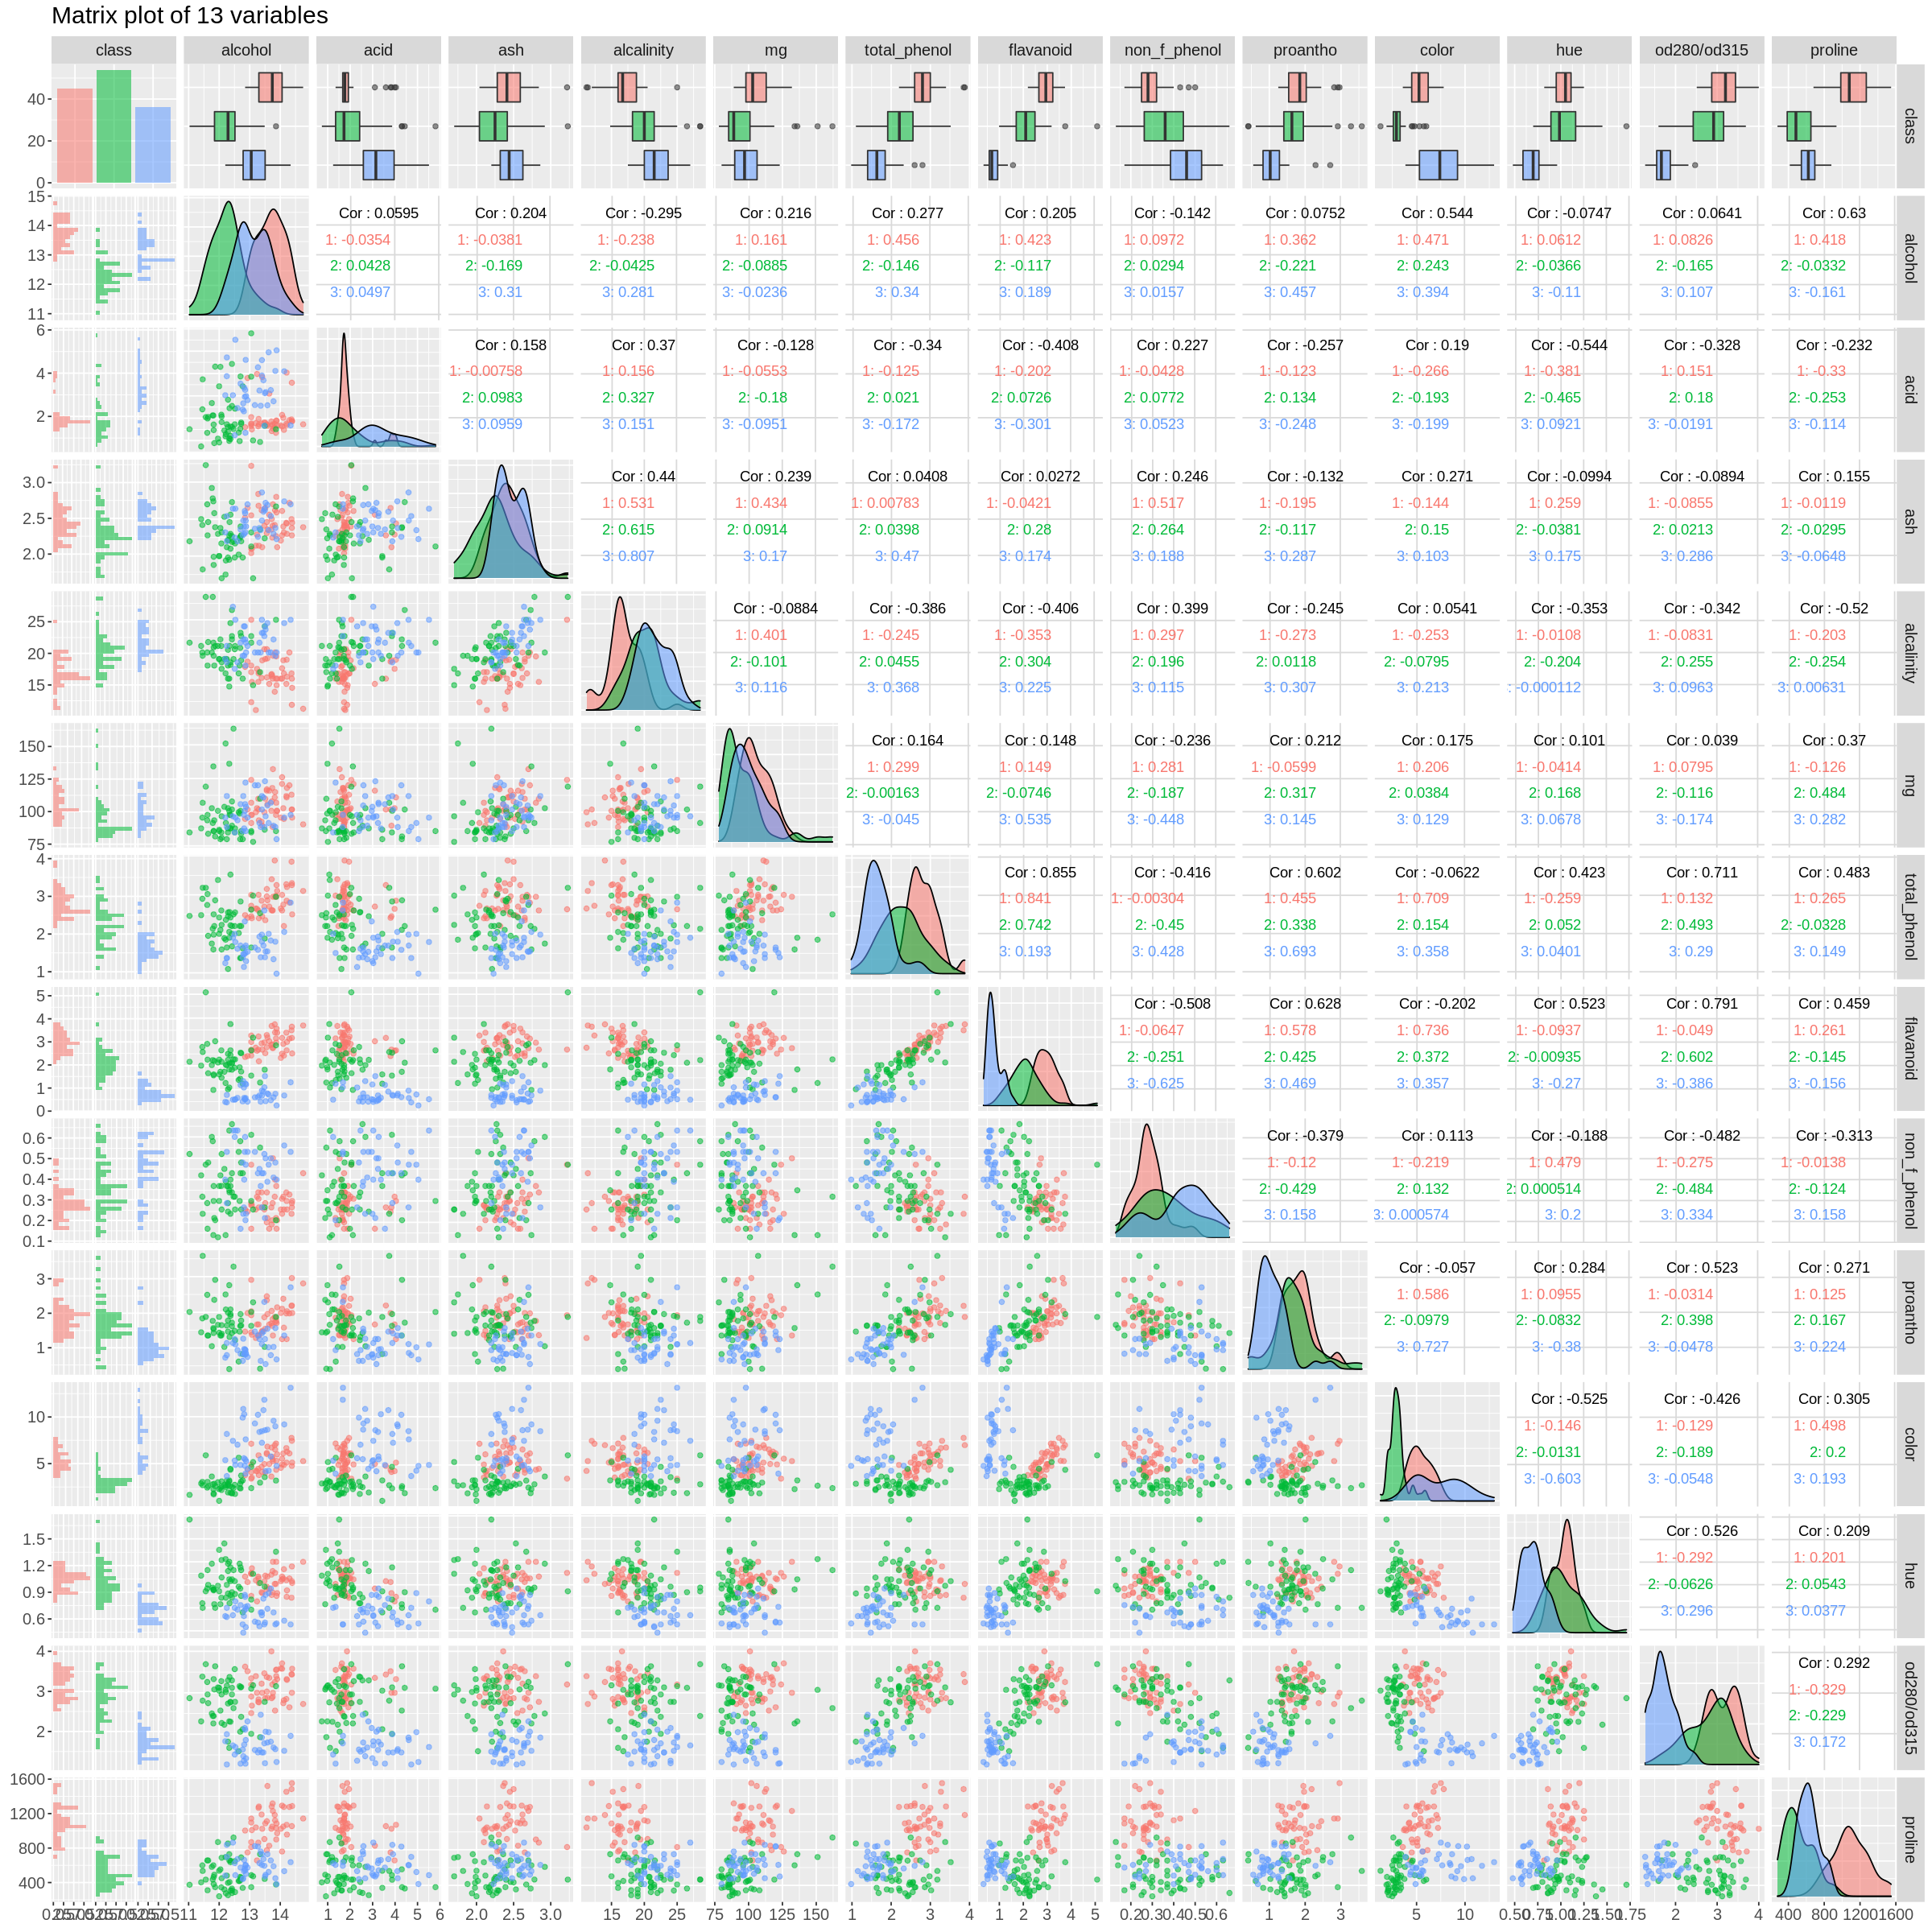

In [7]:
# Matrix plot of 13 variables
options(repr.plot.width = 20, repr.plot.height = 20)
ggpairs(wine_training, aes(color = class, alpha = 0.5), title = "Matrix plot of 13 variables") +
    theme(text = element_text(size = 15))

Looking at the boxplots and histograms of 13 variables above, we could see that the distribution of different wine classes within `alcohol`, `flavanoid`, `color`, `hue`, `proline` are more distinct compared to the other variables (the classes of wine overleaps the least). The distiction between each classes of wine within the variables indicates a higher influence on the classification of wine types. Hence, we decided to narrow down to exploring these 5 variables as we believed they were more relevant to `class`.

We will create a new data set with the chosen variables: `alcohol`, `flavanoid`, `color`, `hue`, `proline` , calling it `wine_main`.

In [8]:
# Create new data set with chosen variables
wine_main <- select(wine_training, class, alcohol, flavanoid, color, hue, proline)

#### Summarization

First, we will report the number of total observations, number of variables, and missing values of the training data set. We will also check the number of observations in each class to see if they are balanced.

In [9]:
# Set display options for values
options(digits = 4)

# Create summary table of total observations, variables, and missing values of data set
total_observations <- nrow(wine_training)
total_variables <- ncol(wine_training)
total_na <- sum(is.na(wine_training))
table1 <- data.frame(total_observations, total_variables, total_na)

# Create summary table of observations in each class of data set
obs_per_class <- wine_training %>%
    group_by(class) %>%
    summarize(count = n(),
    percentage = n() / total_observations * 100)

`summarise()` ungrouping output (override with `.groups` argument)


In [10]:
# Number of total observations, variables (including class), and missing values
table1

total_observations total_variables total_na
1 135                14              0

In [11]:
# Number and percentage of observations in each class
obs_per_class

class count percentage
1 1     45    33.33     
2 2     54    40.00     
3 3     36    26.67

From the table above, we can see that the numbers of observations are quite balanced.

Since we will only explore further 5 main variables, we will only summarise the means and standard deviation of variables within the `wine_main` set.

In [12]:
# Creat summary table for the means and standard deviation of chosen variables
means_of_var <- wine_main %>%
    summarize(across(alcohol:proline, mean)) %>%
    pivot_longer(cols = alcohol:proline,
        names_to = "chemical_components",
        values_to = "mean")

sd_of_var <- wine_main %>%
    select(alcohol:proline) %>%
    map_dfr(sd) %>%
    pivot_longer(cols = alcohol:proline,
        names_to = "chemical_components",
        values_to = "sd") %>%
    select(sd)

summary_tbl <- bind_cols(means_of_var, sd_of_var) %>%
    arrange(mean)

In [13]:
# Means and SD of chosen variables, arranged in ascending order by mean
summary_tbl

chemical_components mean    sd      
1 hue                   0.944   0.2139
2 flavanoid             2.046   0.9869
3 color                 5.009   2.3287
4 alcohol              12.975   0.8128
5 proline             742.556 306.3759

Looking at the table above, if one of our two main predictors were `proline` or `alcohol`, we would certainly need to scale our variables since the K-nearest neighbours algorithm we are using performs classification based on straight-line distance and the ranges of these 2 variables are large. If our predictors were `hue` and `flavanoid` or `flavanoid` and `color`, scaling might not be necessary since the range of these variables are quite close. Regardless, we would still perform scaling as it is good practice.

#### Choosing two main predictors & Visualization

For our main data analysis, we wanted to use only two predictors. Here, we will examine each pair of variables in the chosen set above, and narrow down to two. We do this by a examining a matrix plot of the main variables.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



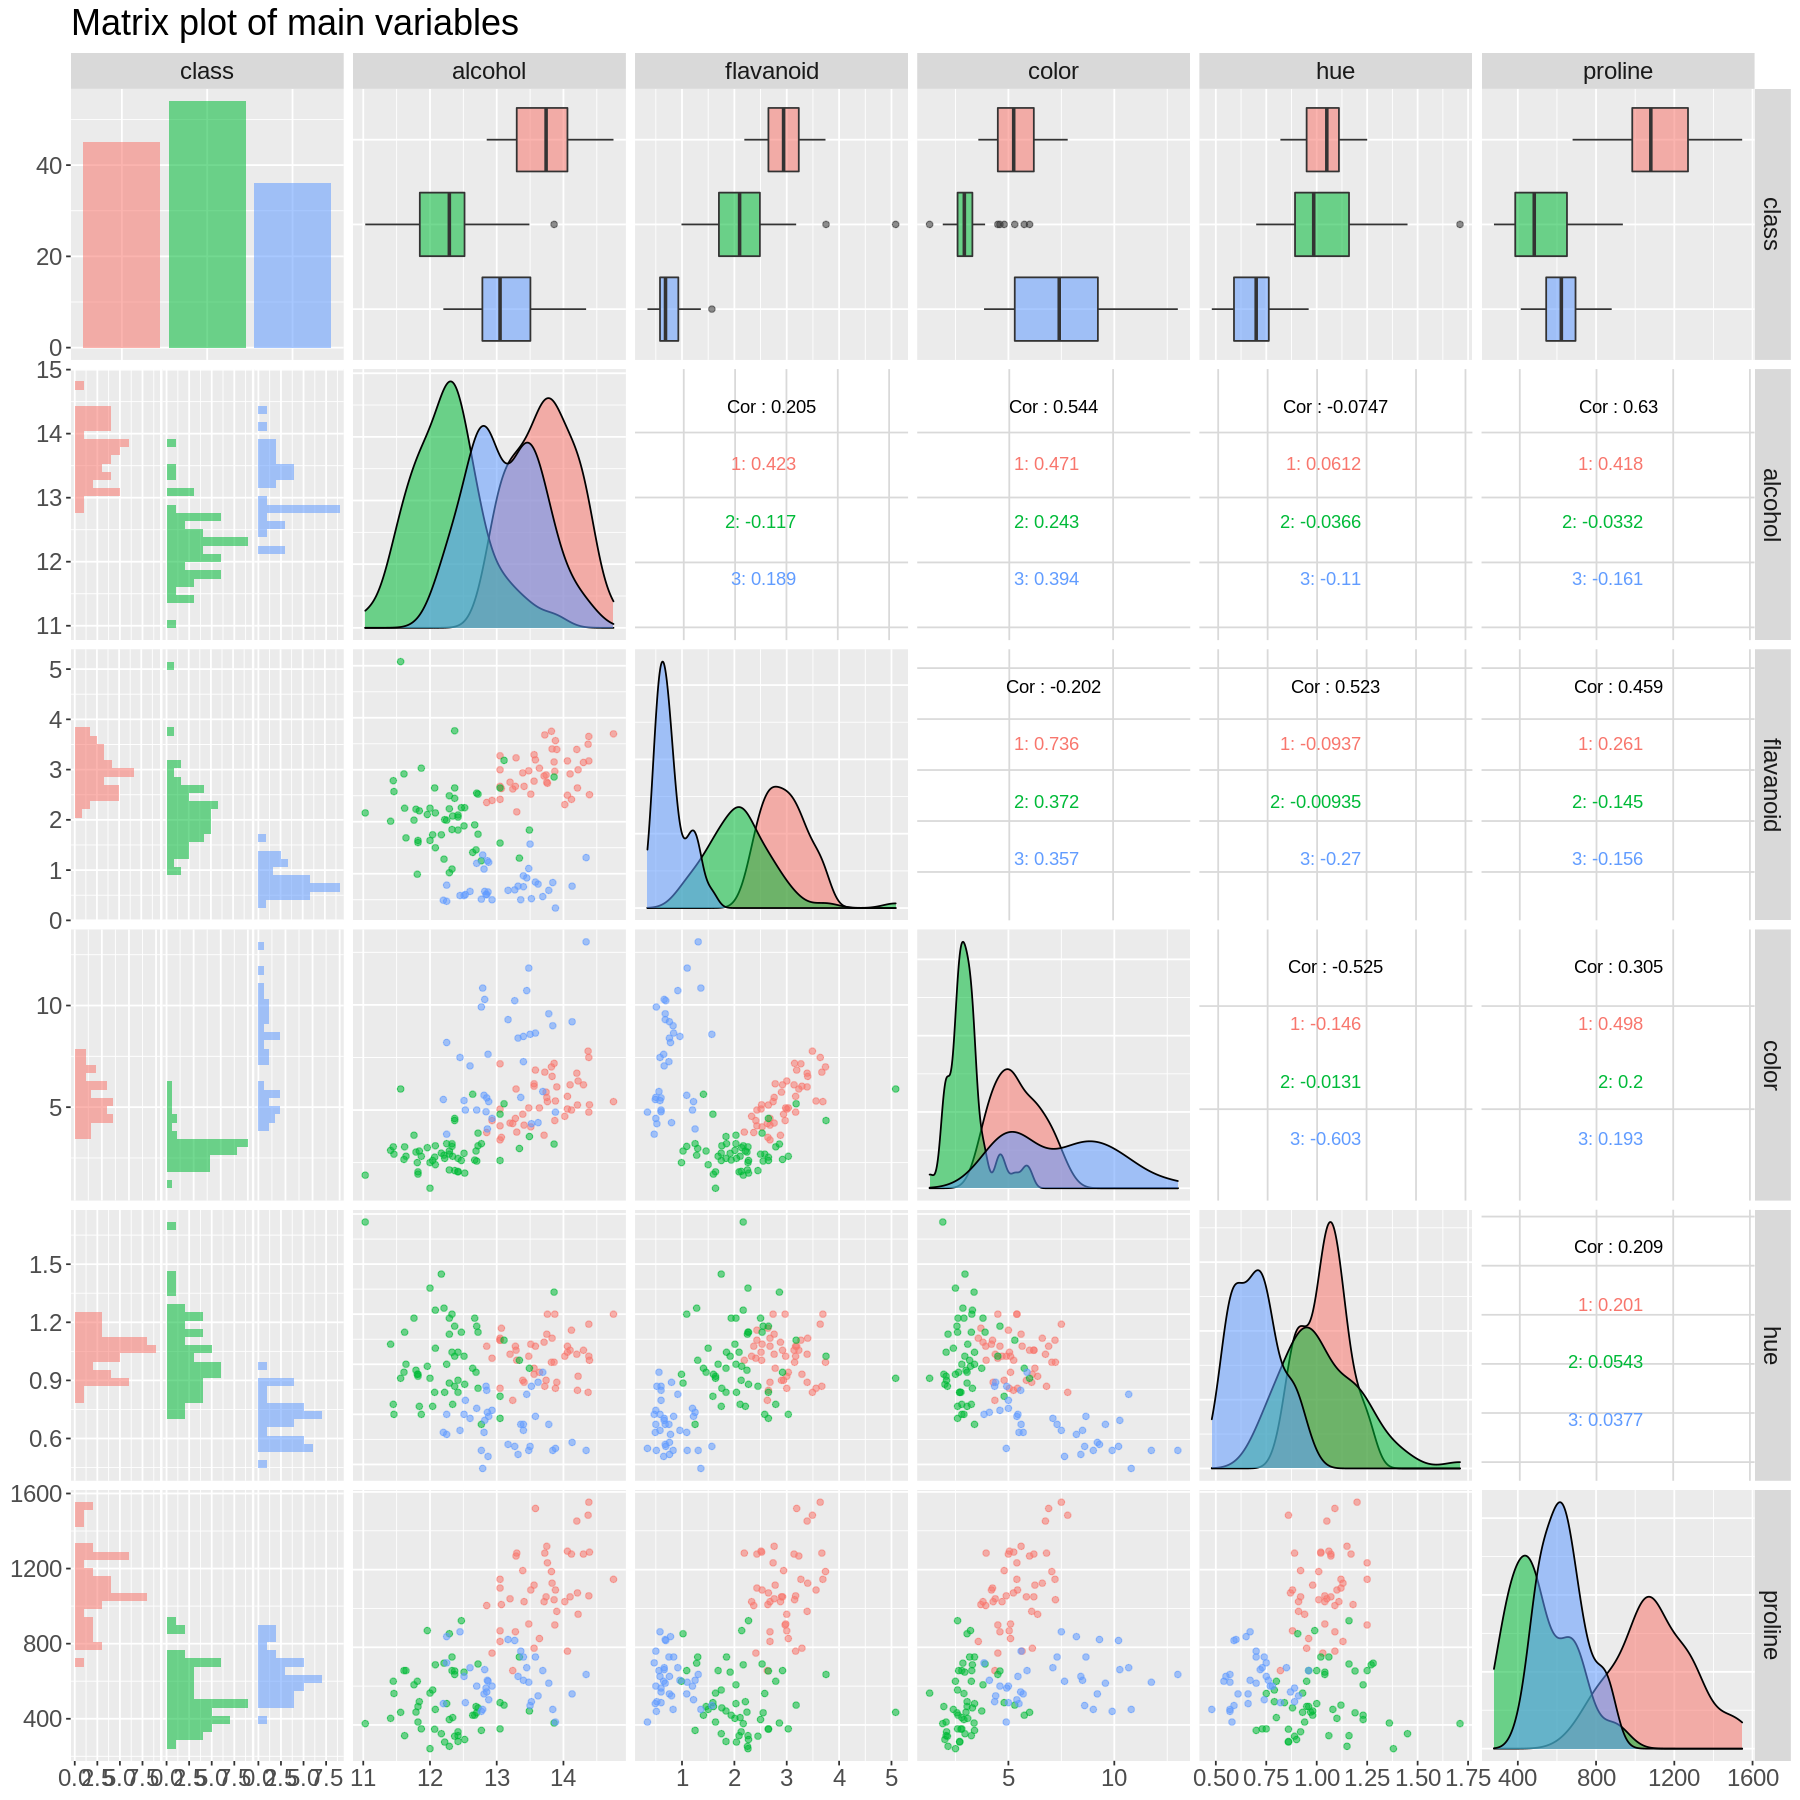

In [14]:
# Visualization using matrix plot to examine each pair of variables in the chosen set
options(repr.plot.width = 15, repr.plot.height = 15)
ggpairs(wine_main, aes(color = class, alpha = 0.5), title = "Matrix plot of main variables") +
    theme(text = element_text(size = 18))

Looking at the matrix plot above (histograms and box plots), it’s apparent the distribution of different wine classes within `flavanoid` and `color` overlaps the least in comparison to other variables. The separation of different classes within a variable makes the classification of wine type clearer as each type would have a more distinct range of values within the variable. Furthermore, in examining the scatter plot of `flavanoid` and `color` it’s evident there is little overplotting of classes' data points, as well as the distribution of different classes are distinct. Hence, we believe `flavanoid` and `color` would be the best predictors for this project.

We will generate a visualization of classes within our two main predictors below.

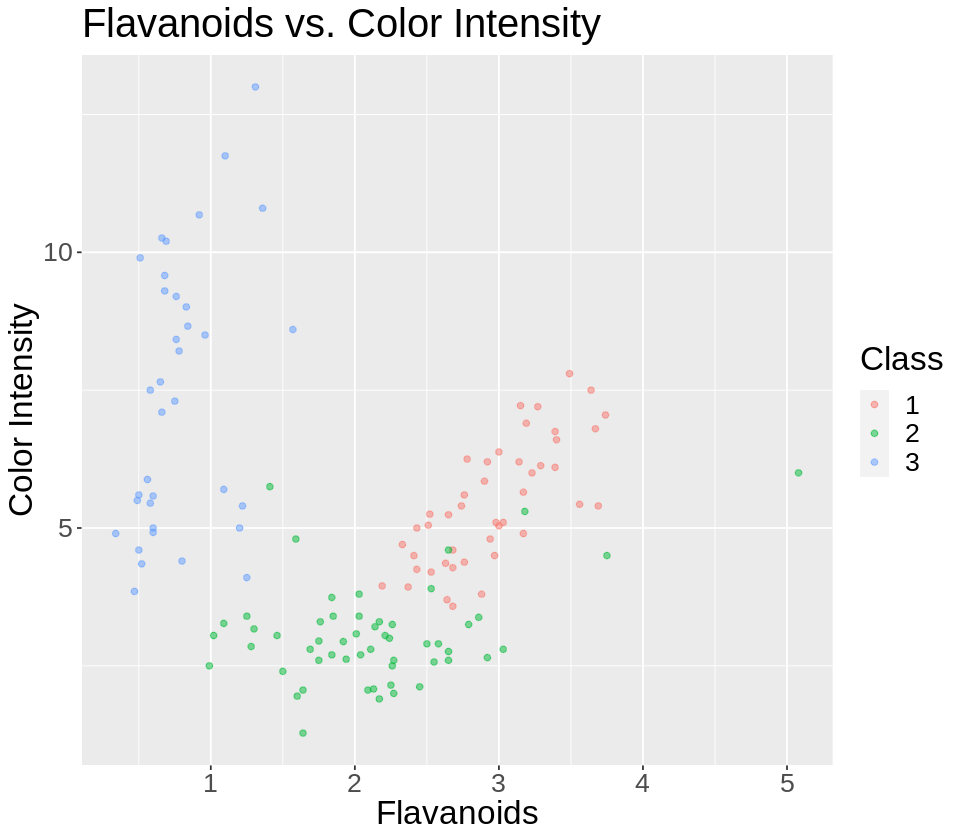

In [15]:
# Clearer scatter plot of Flavanoid vs Color Intensity 
options(repr.plot.width = 8, repr.plot.height = 7)
plot_flava_color <- ggplot(wine_training, aes(x = flavanoid, y = color, color = class)) +
    geom_point(alpha = 0.5) +
    labs(x = "Flavanoids", y = "Color Intensity", color = "Class") +
    ggtitle("Flavanoids vs. Color Intensity") +
    theme(text = element_text(size = 20))
plot_flava_color

Now that the two predictor variables have been chosen, the columns for the training and testing data sets can be narrowed down for better readability during the analysis.

In [16]:
wine_training <- select(wine_training, class, color, flavanoid)
wine_testing <- select(wine_testing, class, color, flavanoid)

head(wine_training)
head(wine_testing)

class color flavanoid
1 1     4.38  2.76     
2 1     7.80  3.49     
3 1     6.75  3.39     
4 1     5.25  2.52     
5 1     5.05  2.51     
6 1     7.22  3.15

class color flavanoid
1 1     5.64  3.06     
2 1     5.68  3.24     
3 1     4.32  2.69     
4 1     5.20  2.98     
5 1     5.75  3.32     
6 1     7.30  2.91

### Main Data Analysis

Now, we will start building our K-nearest neighbours model for classifying wine types (`class`) using two predictors `flavanoid` and `color`. We do this by first standardizing our predictors, then we will find the best value for our parameter K through a 5-fold cross-validation process. Only then will we create our classifier, train it, and evalute its accuracy using our testing data set. The detailed process is as follows:

**Step 1**: Find the best value for parameter K.

Step 1.1: Create a model specification with tuning on the number of neighbours and a recipe to preprocess our data.

In [17]:
# Model specification
wine_tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")
# Recipe
wine_recipe <- recipe(class ~ flavanoid + color, data = wine_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
wine_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Step 1.2: Perform cross-validation and create data analysis workflow.

We changed the number of folds to increase or decrease accuracy. The best number of folds here seemed to be 5.

In [18]:
# Perform 5-fold cross-validation
wine_vfold <- vfold_cv(wine_training, v = 5, strata = class)

# Workflow
wine_tune_workflow <- workflow() %>%
    add_recipe(wine_recipe) %>%
    add_model(wine_tune_spec)
wine_tune_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Step 1.3: Use the workflow and cross-validation to find the best number of nearest neighbours.

We decided that the most reasonable range of parameter values should be from 1 to 15 since we would want it to be at most half the minimum number of observations in each class (which was 36 from our `obs_per_class` table). We will choose K with the optimal accuracy.

In [19]:
gridvals <- tibble(neighbors = seq(from = 1, to = 15))

wine_tune_results <- wine_tune_workflow %>%
    tune_grid(resamples = wine_vfold, grid = gridvals) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")
wine_tune_results

neighbors .metric  .estimator mean   n std_err .config
1   1        accuracy multiclass 0.9113 5 0.01836 Model01
2   2        accuracy multiclass 0.9113 5 0.01836 Model02
3   3        accuracy multiclass 0.9111 5 0.02228 Model03
4   4        accuracy multiclass 0.9111 5 0.02228 Model04
5   5        accuracy multiclass 0.9182 5 0.02196 Model05
6   6        accuracy multiclass 0.9182 5 0.02196 Model06
7   7        accuracy multiclass 0.9407 5 0.01485 Model07
8   8        accuracy multiclass 0.9407 5 0.01485 Model08
9   9        accuracy multiclass 0.9407 5 0.01485 Model09
10 10        accuracy multiclass 0.9407 5 0.01485 Model10
11 11        accuracy multiclass 0.9407 5 0.01485 Model11
12 12        accuracy multiclass 0.9407 5 0.01485 Model12
13 13        accuracy multiclass 0.9330 5 0.01864 Model13
14 14        accuracy multiclass 0.9330 5 0.01864 Model14
15 15        accuracy multiclass 0.9256 5 0.02070 Model15

From here, there are two ways to choose the best K-value: manually or automatically.  First, we will show the manual method, which is slightly more accurate.  After, we will show the automatic method.

*Manual Method:* Use a line plot to visualize Accuracy versus K and choose the number of neighbours from there.  This requires one to look at the graph and choose the value himself/herself, which is slower, however, might be more accurate as there are more to consider than just choosing the K-value with the highest accuracy.

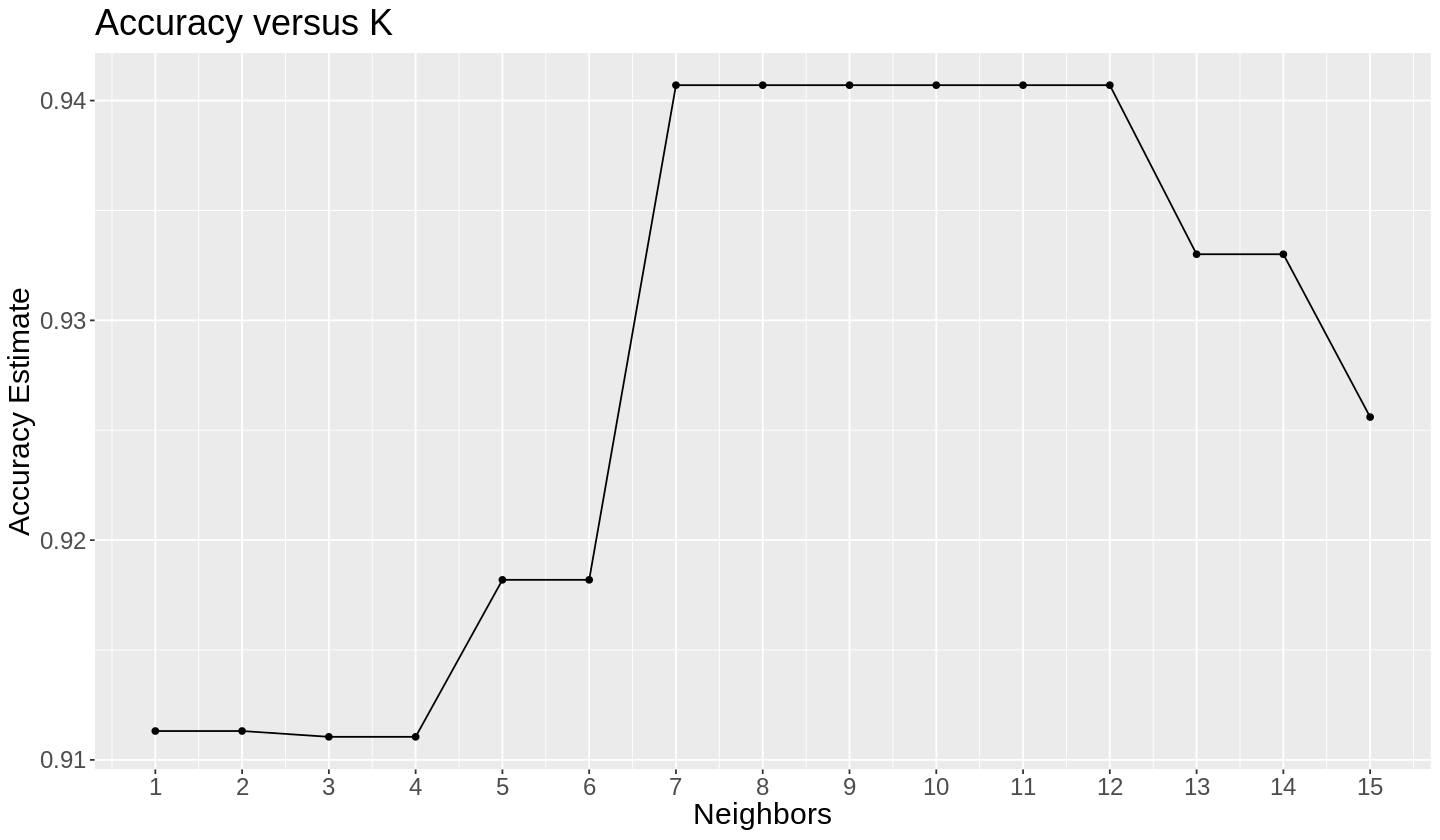

In [20]:
options(repr.plot.width = 12, repr.plot.height = 7)

accuracy_vs_k <- ggplot(wine_tune_results, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracy versus K") + 
    theme(text = element_text(size = 18)) +
    scale_x_continuous(breaks = 1:15)

accuracy_vs_k

From the plot above, any selection of K within the range of 7 to 12 would be appropriate as we would still achieve optimal accuracy while maintaining a reasonable training cost. We decided to choose K = 9 as it's in the middle of the range, so changing the value to a nearby one does not decrease accuracy.  This makes K = 9 more likely to be close to the actual most accurate K value.

In [21]:
# Set best K for this model
best_k = 9

*Automatic method:* Arrange the rows of the table by decreasing mean accuracy, then pick the first value that shows up.  Although it will always return a value with the highest accuracy, this will always pick the lowest number of neighbours that reaches the maximum accuracy, which means that changing to any lower values will always decrease it.  This method is fast and gives decent K values, but they are not necessarily the best ones possible.

In [22]:
wine_min_neighbours_table <- wine_tune_results %>%
    arrange(desc(mean)) %>%
    slice(1)
wine_min_neighbours_table

neighbors .metric  .estimator mean   n std_err .config
1 7         accuracy multiclass 0.9407 5 0.01485 Model07

In [23]:
# To pull the number of neighbours from this method, use the pull function.
wine_min_neighbours <- pull(wine_min_neighbours_table, neighbors)
wine_min_neighbours

[1] 7

Now that we have the best number of neighbours, we can move on to step 2.

**Step 2**: Use the best number of neighbours to rebuild a best model and recipe for predictions.

Step 2.1: Create a best model.

In [24]:
wine_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Step 2.2: Create a best workflow using the best model, the recipe is still the same as before.

In [25]:
wine_best_workflow <- workflow() %>%
    add_recipe(wine_recipe) %>%
    add_model(wine_best_spec)

Step 2.3: Fit the workflow to the training data.

In [26]:
wine_fit <- fit(wine_best_workflow, data = wine_training)

## Results

**Step 3:** Use the model to predict the wine classes.

Step 3.1: Make predictions by using the fitted workflow on the testing data.

In [27]:
wine_predictions <- wine_fit %>%
    predict(wine_testing) %>%
    bind_cols(wine_testing)
head(wine_predictions)

.pred_class class color flavanoid
1 1           1     5.64  3.06     
2 1           1     5.68  3.24     
3 1           1     4.32  2.69     
4 1           1     5.20  2.98     
5 1           1     5.75  3.32     
6 1           1     7.30  2.91

**Step 4:** Analyze the predictions made.

Step 4.1: Calculate the accuracy of the predictions.

In [28]:
wine_accuracy <- wine_predictions %>%
    metrics(truth = class, estimate = .pred_class) %>%
    filter(.metric == "accuracy")
wine_accuracy

.metric  .estimator .estimate
1 accuracy multiclass 0.8837

From the table above, we can see that our classifier achieved a 88% estimated accuracy on the test data.

Step 4.2: Visualize actual classes versus predicted classes made by our model.

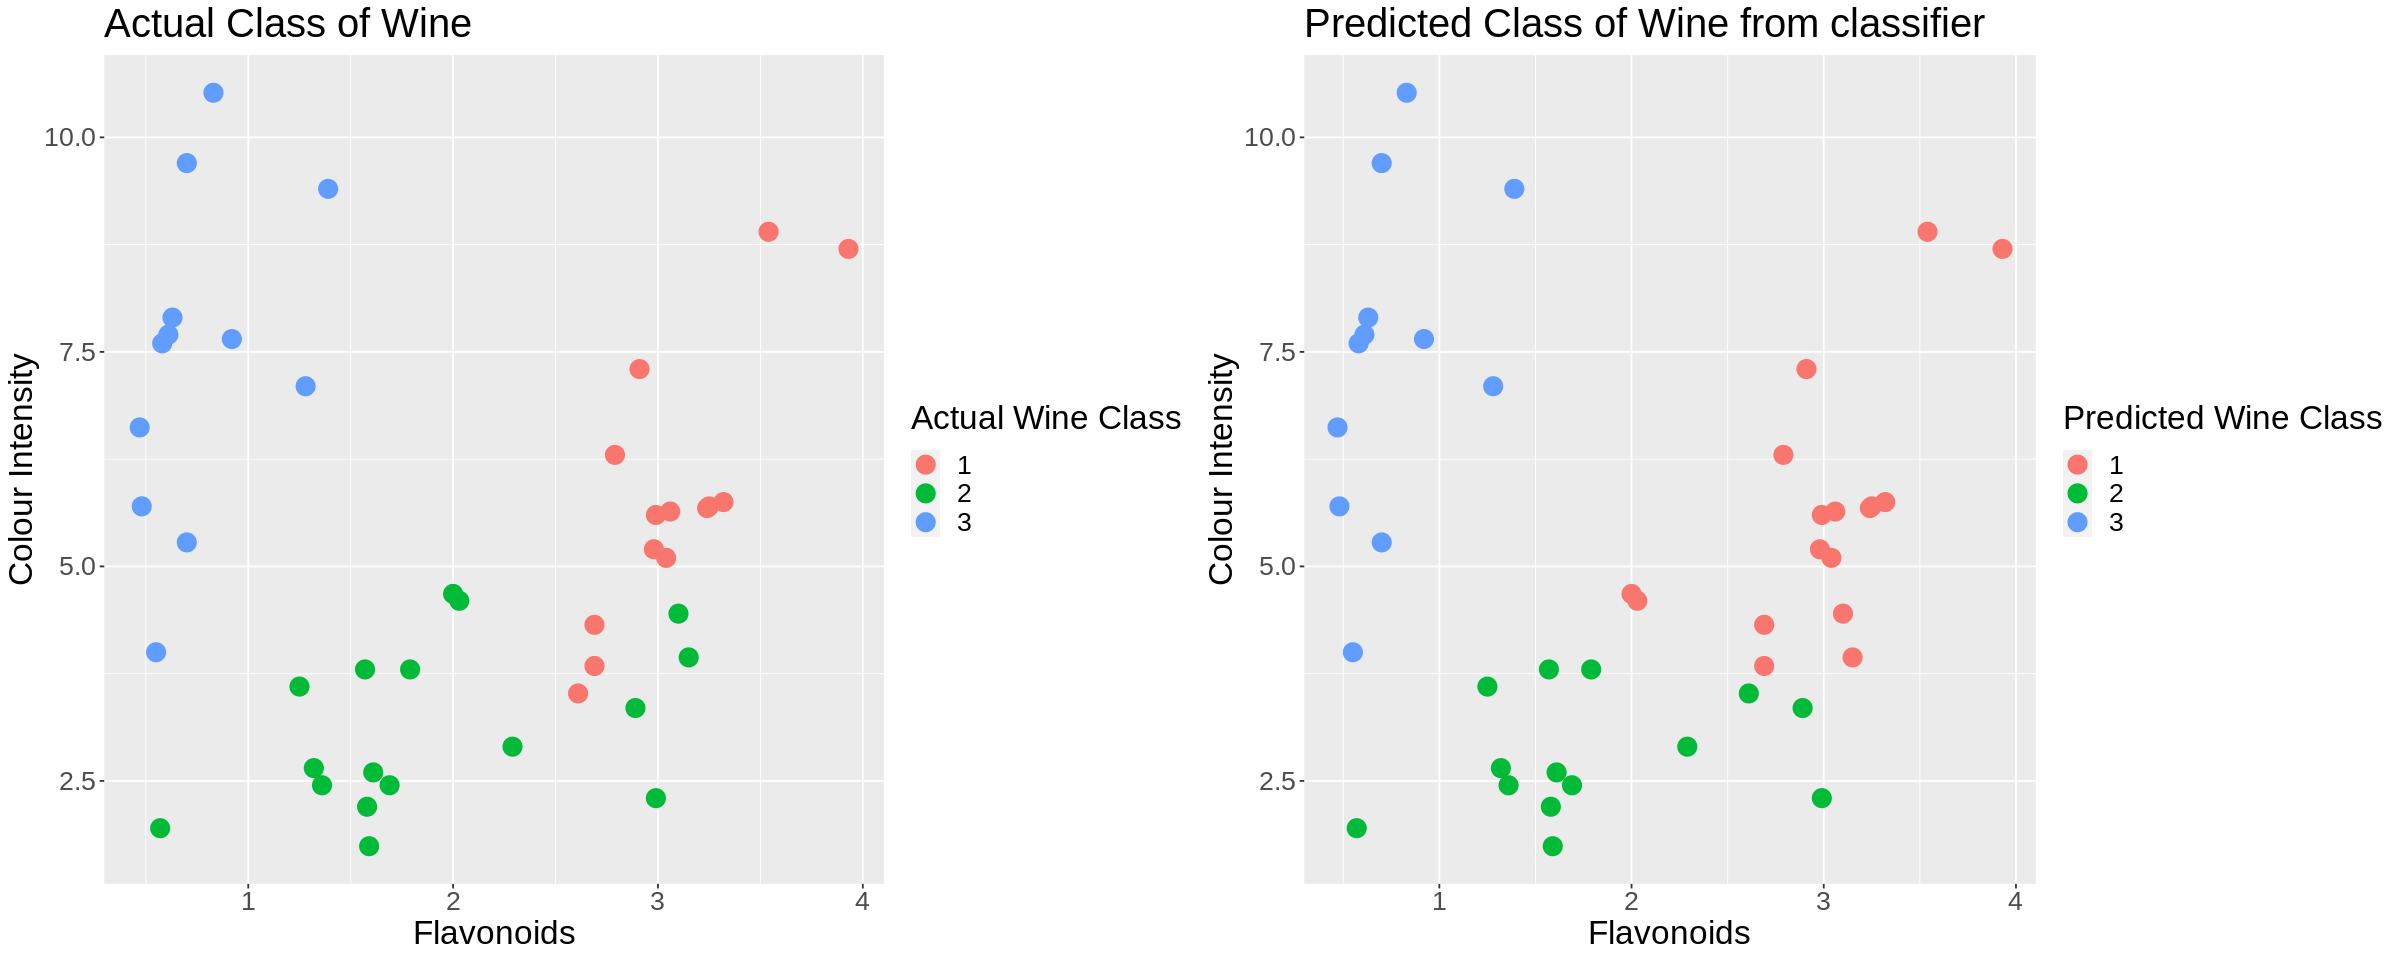

In [29]:
options(repr.plot.width = 20, repr.plot.height = 8)

actual_plot <- ggplot(wine_predictions, aes(x = flavanoid, y = color)) +
    geom_point(aes(color = class), size = 5) +
    labs(x = "Flavonoids", y = "Colour Intensity", color = "Actual Wine Class") +
    ggtitle("Actual Class of Wine") +
    theme(text = element_text(size = 20))

predict_plot <- ggplot(wine_predictions, aes(x = flavanoid, y = color)) +
    geom_point(aes(color = .pred_class), size = 5) +
    labs(x = "Flavonoids", y = "Colour Intensity", color = "Predicted Wine Class") +
    ggtitle("Predicted Class of Wine from classifier") +
    theme(text = element_text(size = 20))

plot_grid(actual_plot, predict_plot, nrow = 1)

With these side-by-side plots visualization, we can see that our model was able to classified class 3 with a 100% accuracy rate, while there are some mistakes between class 1 and 2 predictions. A matrix confusion (below) will help us understand better the predictions' result using our model.

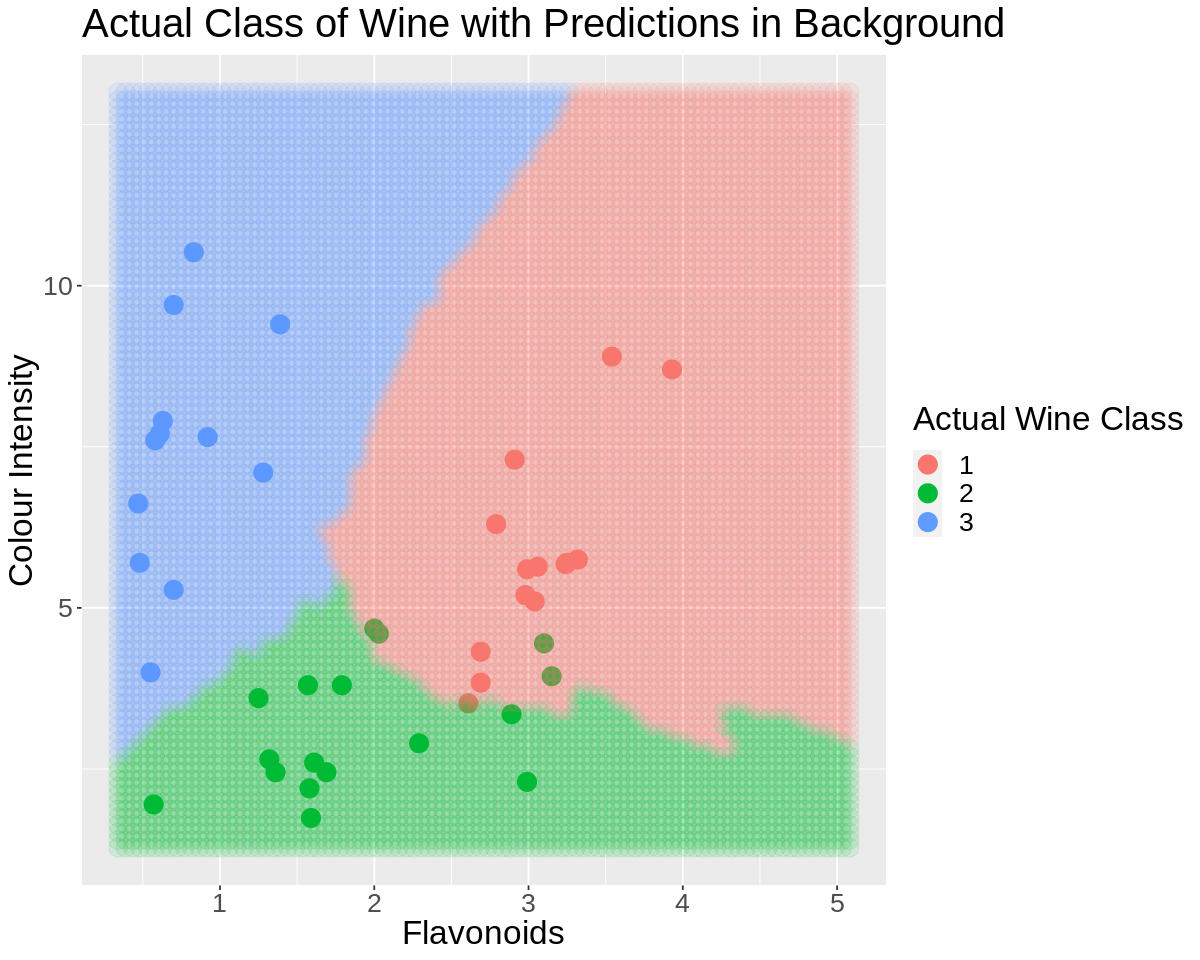

In [30]:
options(repr.plot.width = 10, repr.plot.height = 8)

flav_grid <- seq(min(wine$flavanoid, na.rm = TRUE),
    max(wine$flavanoid, na.rm = TRUE),
    length.out = 100)
color_grid <- seq(min(wine$color, na.rm = TRUE),
    max(wine$color, na.rm = TRUE),
    length.out = 100)

complete_grid <- as_tibble(expand.grid(flavanoid = flav_grid, color = color_grid))

prediction_grid <- wine_fit %>%
    predict(complete_grid) %>%
    bind_cols(complete_grid)

prediction_grid_plot <- ggplot() +
    geom_point(data = wine_predictions, 
               mapping = aes(x = flavanoid, y = color, color = class), 
               size = 5) +
    geom_point(data = prediction_grid, 
               mapping = aes(x = flavanoid, y = color, color = .pred_class), 
               size = 5, 
               alpha = 0.1) +
    labs(x = "Flavonoids", y = "Colour Intensity", color = "Actual Wine Class") +
    ggtitle("Actual Class of Wine with Predictions in Background") +
    theme(text = element_text(size = 20))
prediction_grid_plot

Looking at the graph shown above, the shaded colored areas on the graph help depict the boundaries of each predicted wine type made by our classifier.  It shows that class three has a 100% accuracy rate as all blue dots appear in the blue shaded area, it’s also apparent there is some false classification of type two and type one.  If the dataset had been larger this graph could be useful in determining whether the dataset was underfitted or overfitted.

Step 4.3: Create a confusion matrix of the predictions.

In [31]:
confusion <- wine_predictions %>%
    conf_mat(truth = class, estimate = .pred_class)
confusion

obs <- wine_testing %>%
    group_by(class) %>%
    summarize(count = n(),
    percentage = n() / total_observations * 100)
obs

          Truth
Prediction  1  2  3
         1 13  4  0
         2  1 13  0
         3  0  0 12

`summarise()` ungrouping output (override with `.groups` argument)


class count percentage
1 1     14    10.370    
2 2     17    12.593    
3 3     12     8.889

This confusion matrix and graph above compliment each other by visualizing the accuracy of the predictions in multiple ways.  We utilized the confusion matrix for the classifier to show the table of predicted categories and correct categories.  From this table the number of false positives and false negatives are apparent and the accuracy rates can be established. In some classification problems, a false negative can be more dangerous than a false positive for example if you’re testing for cancer, however in this particular dataset, a false negative or positive is the same level of severity.  From the confusion matrix shown, it’s clear the accuracy rate for type one wine (Pinot Noir) is 93%, the second type of wine (Cabernet Sauvignon) was 76%, and the third wine (Merlot) has a 100% accuracy rate.

## Discussion
To determine the success of our predicted model, we split the data such that 75% of our dataset was trained for classification using K = 9.  Through the exploration of the wine, classification data set we were able to determine a 100% accuracy rate at classifying the third type of wine, Merlot, which is excellent as it’s leading in global popularity for dark red wines.  This information was established using a confusion matrix code. The next highest accuracy rate was the first wine type, Pinot Noir, which was impressively successful as well with an accuracy rate of 93%.  Lastly, the second wine type was relatively successful with a success rate of 76%, which is still optimistic for this model. It’s possible the errors occurred because Pinot Noir (type one) and Cabernet Sauvignon (type two) had many similar flavonoid and color intensity values that the proposed model could not differentiate between.  However, upon examining the model as a whole, it had a very high success rate and the findings were very optimistic.

These results were the expected findings from our preliminary exploration of this wine classification data set. Our group aimed to have an 85% success rate for the three wine types, based on previous analysis conducted on this dataset, the actual combined accuracy rate across the three types of wine was 89.7% and our model's estimated accuracy rate was 88%, exceeding our expectations.  Jonathon Betchel previously performed an analysis on the wine dataset, however, he achieved an accuracy rate of only 77% using the K-Nearest Neighbour Algorithm, with the primary difference in our analysis being we selected two variables whereas he included all 13 variables. Since his analysis included all variables as predictors, the classes' predictions could have been influenced by both more-relevant-to-the-class and less-relevant-to-the-class variables, which resulted in a lower success rate.  Another unexpected finding was the similarity between Pinot Noir and Cabernet Sauvignon (type one and type two), which is most likely the source of the accuracy errors across those two categories.

The impact of these findings could be incredibly high, as in British Columbia alone the wine industry contributes an annual 2.8 billion dollars to the province's economy; the wine industry also covers three sectors, agriculture, manufacturing, and trade. The scope of impact this research can have is enormously large as it spans many different sectors. Consumers are also specific about the type of wine they wish to purchase so accurately classifying the types of wine is important to the wine industry. This form of classification looks beyond the BC area as the global wine market in 2020 produced 339.53 billion dollars, so it’s evident how large and essential the wine industry is and how this classification is important in understanding the wine types (for example white wine, red wine, and pink wine).

What future questions could this lead to? This classification could lead to a vast possibility of questions such as: Are there more than three types of classifications of wine? Is one type of wine healthier to consume than another? Which type of wine is more sought after and more heavily consumed? It’s evident how large of an industry wine is, so it’s important to continue the classification and research of wine types and understand the impact on the global (or provincial) market.


## References

[1] Forina, M. et. al. (1991). Wine Data Set. UCI Machine Learning Repository. Accessed March 10, 2022, at 
https://archive.ics.uci.edu/ml/datasets/wine

[2] Timbers, T., Campbell, T., &amp; Lee, M. (2022). Data science: A first introduction. Routledge &amp; CRC Press. Accessed March 10, 2022, at https://www.routledge.com/Data-Science-A-First-Introduction/Timbers-Campbell-Lee/p/book/9780367524685 

[3] Wine Enthusiast. (2018, Nov. 26). Everything You Need to Know About Merlot. Wine Enthusiast Magazine. Accessed March 10, 2022, at https://www.winemag.com/2018/11/26/everything-you-need-to-know-about-merlot/

[4] Classifying Wines. (2018, Feb. 6). Data Blog. Accessed March 10, 2022, at https://jonathonbechtel.com/blog/2018/02/06/wines/

[5] Puckette, M. (2021, Jul. 12). Pinot Noir. Wine Folly. Accessed March 10, 2022, at https://winefolly.com/grapes/pinot-noir/

[6] What is Cabernet Sauvignon? A Guide. (n.d.). VinePair. Accessed March 10, 2022, at https://vinepair.com/wine-101/what-is-cabernet-sauvignon/

[7] Ballard, J. (2019, Nov. 5). This is the most popular wine in America. YouGovAmerica. Accessed March 10, 2022, at https://today.yougov.com/topics/food/articles-reports/2019/11/05/most-popular-best-wine-poll-survey 
